In [29]:
from sklearn.linear_model import LogisticRegression

from model_utils import load_dataset, run_experiment, print_results, plot_residuals

In [30]:
dataset = load_dataset()

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:19<00:00,  1.18it/s]


In [31]:
for test_score in ['sat_math', 'sat_ebrw']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)
    
for test_score in ['math_4', 'math_8', 'reading_4', 'reading_8']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)

<a id='models'></a>

# LOGISTIC REGRESSION MODELS

Average the entire year of data for each district. Same model is used for all states.

This yields only ~173 rows, so we use k-fold Cross Validation to measure model performance. _Note that the folds are constructed to ensure that all data from a given state is in either the test or train split._

Unless otherwise noted, all models use engagement data (split by product type), locale type data, and broadband data, but not the socioeconomic data (due to missing data issues that would reduce the size of the dataset).

### 4th and 8th Grade Test Score (& Change) Models

Each baseline trains 4 logistic regression models (default sklearn parameters), one for each combination of 4th & 8th grade, math & reading test scores, using 5-fold cross-validation. The target variable is either the raw 2022 test scores or the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Model 1a___: Predict raw test scores. ([Model](#model1a_model) / [Results](#model1a_results))
- ___Model 1b___: Predict change in test scores. ([Model](#model1b_model) / [Results](#model1b_results))
- ___Model 2a___: Predict raw test scores from locale data only (i.e., data used by best baseline model). ([Model](#model2a_model) / [Results](#model2a_results))
- ___Model 2b___: Predict change in test scores from engagement and locale data only (i.e., data used by best baseline models). ([Model](#model2b_model) / [Results](#model2b_results))

### SAT Score (& Change) Models

Each baseline trains 2 logistic regression models (default sklearn parameters), one for math and one for reading SAT scores, using 5-fold cross-validation. The target variable is either the raw 2022 test scores or the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Model 1c___: Predict raw test scores. ([Model](#model1c_model) / [Results](#model1c_results))
- ___Model 1d___: Predict change in test scores. ([Model](#model1d_model) / [Results](#model1d_results))
- ___Model 2c___: Predict raw test scores from engagement data only (i.e., data used by best baseline model). ([Model](#model2c_model) / [Results](#model2c_results))
- ___Model 2d___: Predict change in test scores from broadband data only (i.e., data used by best baseline model). ([Model](#model2d_model) / [Results](#model2d_results))

<a id='model1a_model'></a>

## Model 1a: Predict 8th and 4th Grade Test Scores from All Data

[(Back to top)](#models)

In [32]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;math_4_2022', 
           'testscores;math_8_2022', 
           'testscores;reading_4_2022', 
           'testscores;reading_8_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   LogisticRegression(), 
                                   n_splits=5)


Dataset for testscores;math_4_2022 has 174 samples after filtering
Dataset for testscores;math_8_2022 has 173 samples after filtering
Dataset for testscores;reading_4_2022 has 174 samples after filtering


C:\Users\drawi\anaconda3\envs\fall22\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset for testscores;reading_8_2022 has 173 samples after filtering


<a id='model1a_results'></a>

### Model 1a Testing Results

[(Back to top)](#models)

In [34]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_2022
test_r2,-0.6774
test_root_mean_squared_error,8.2112


testscores;math_4_2022: 8.2112


,testscores;math_8_2022
test_r2,-0.9126
test_root_mean_squared_error,7.5845


testscores;math_8_2022: 7.5845


,testscores;reading_4_2022
test_r2,-0.5821
test_root_mean_squared_error,7.6404


testscores;reading_4_2022: 7.6404


,testscores;reading_8_2022
test_r2,-0.8855
test_root_mean_squared_error,6.2653


testscores;reading_8_2022: 6.2653


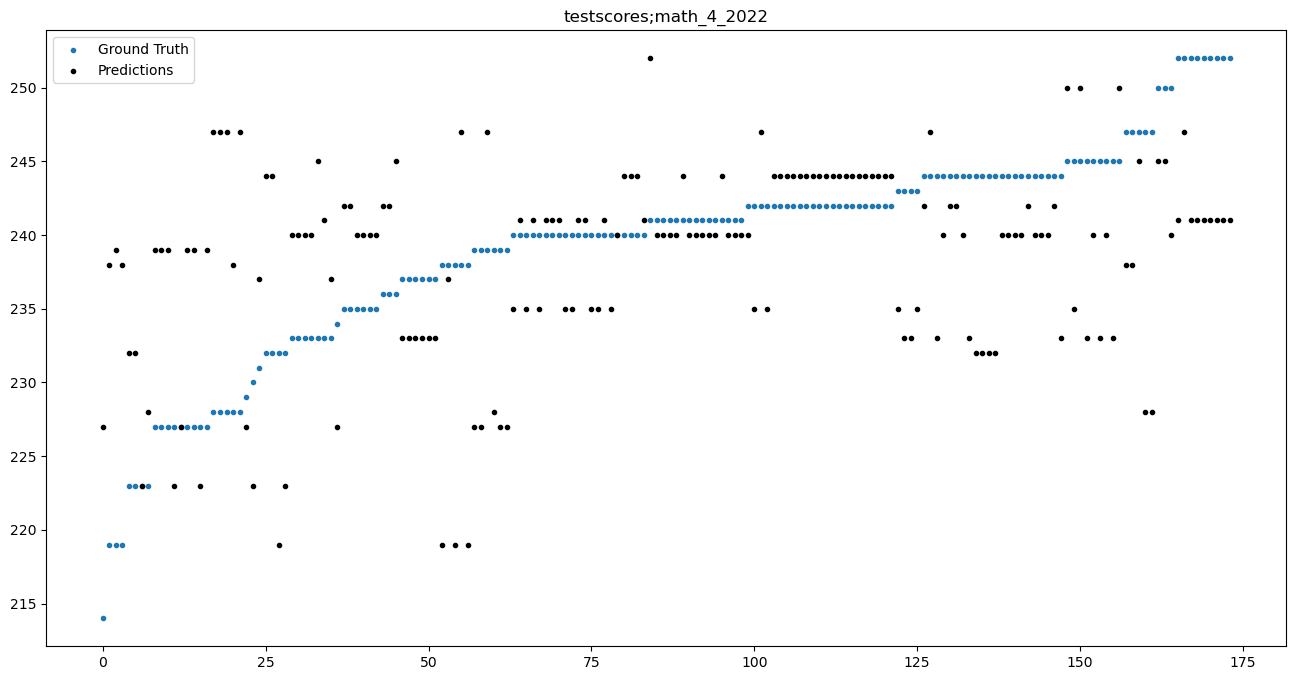

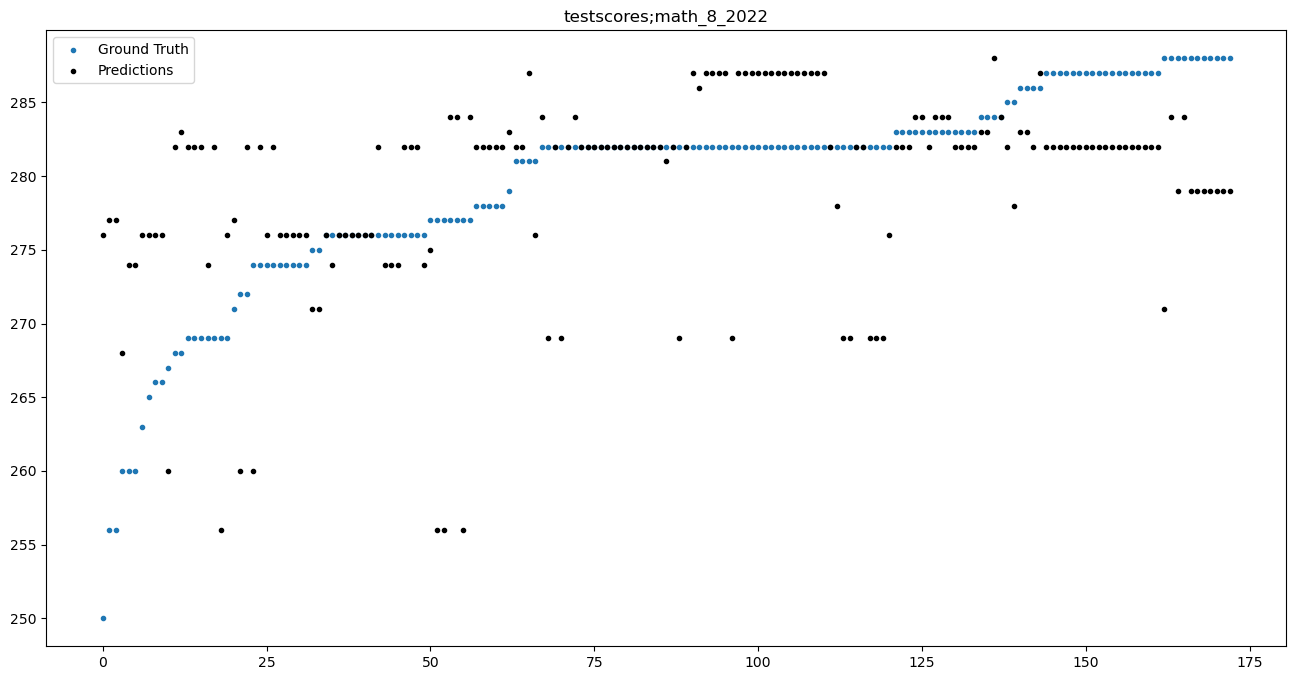

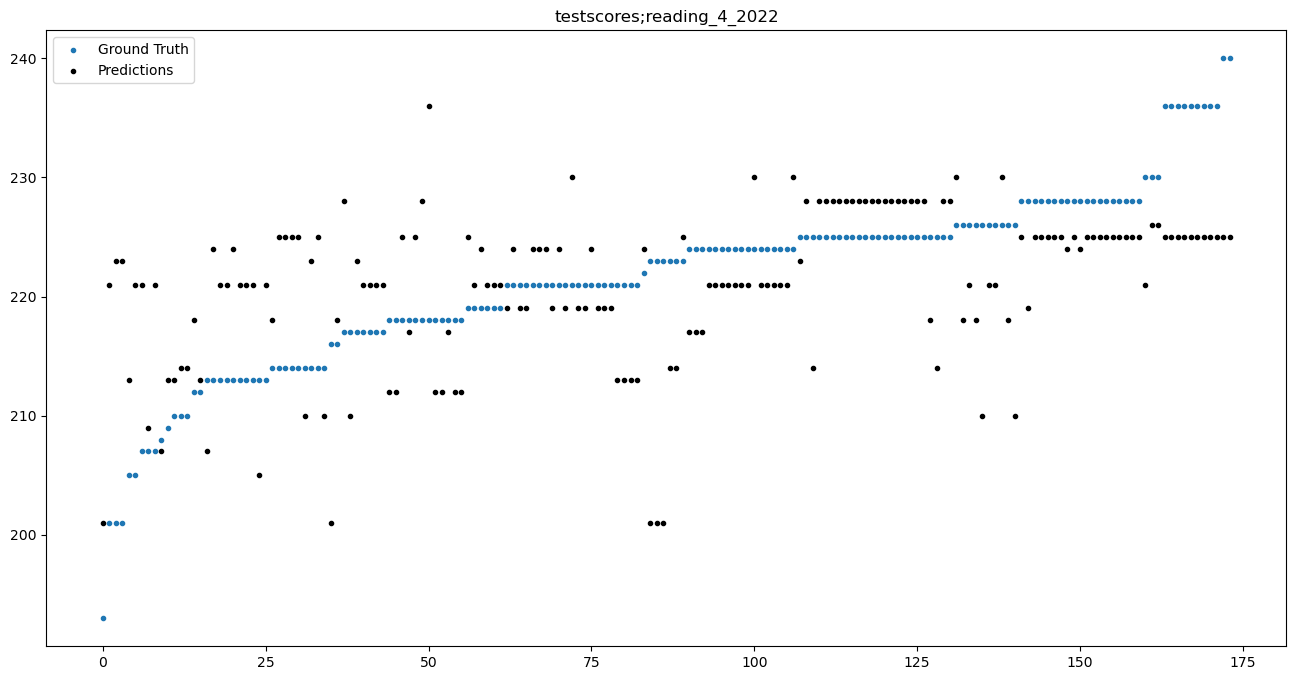

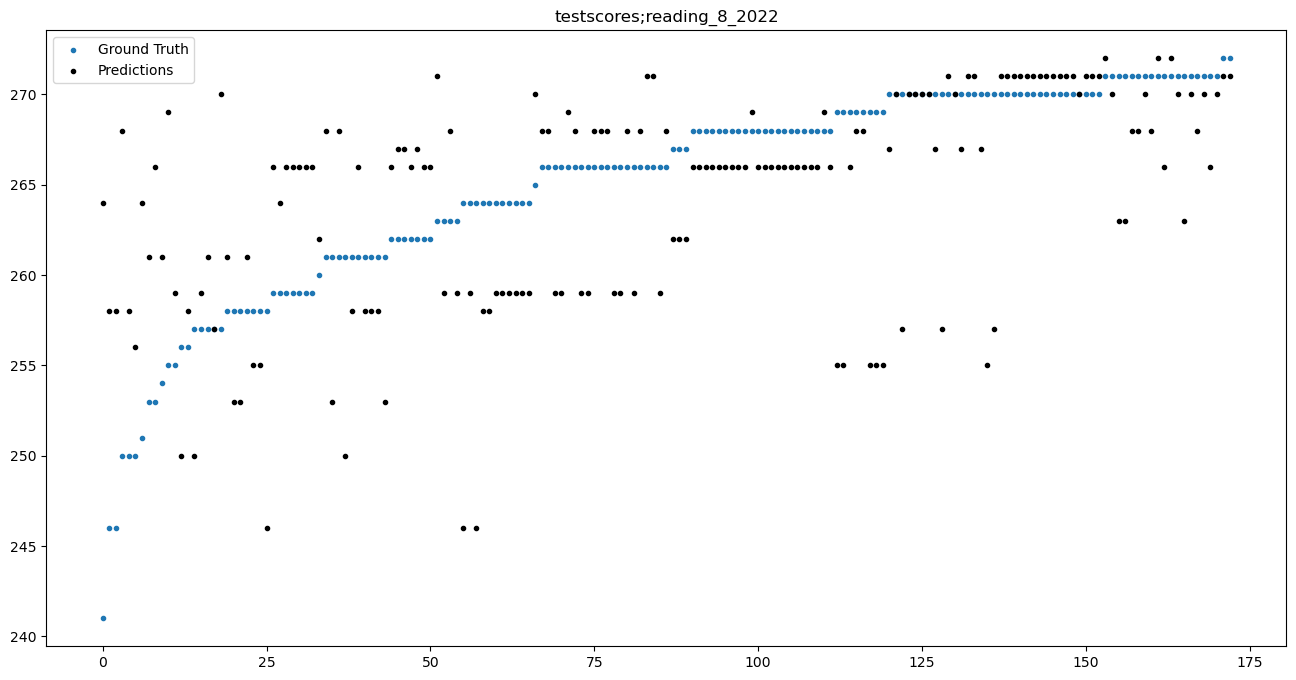

In [35]:
plot_residuals(five_fold_results)

<a id='model1b_model'></a>

## Model 1b: Predict Change In 8th and 4th Grade Test Scores from All Data

[(Back to top)](#models)

In [37]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;math_4_delta', 
           'testscores;math_8_delta', 
           'testscores;reading_4_delta', 
           'testscores;reading_8_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   LogisticRegression(), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


C:\Users\drawi\anaconda3\envs\fall22\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drawi\anaconda3\envs\fall22\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

<a id='model1b_results'></a>

### Model 1b Testing Results

[(Back to top)](#models)

In [38]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-1.4183
test_root_mean_squared_error,5.0207


testscores;math_4_delta: 5.0207


,testscores;math_8_delta
test_r2,-0.8437
test_root_mean_squared_error,4.0267


testscores;math_8_delta: 4.0267


,testscores;reading_4_delta
test_r2,-1.6145
test_root_mean_squared_error,4.5313


testscores;reading_4_delta: 4.5313


,testscores;reading_8_delta
test_r2,-1.8597
test_root_mean_squared_error,5.1411


testscores;reading_8_delta: 5.1411


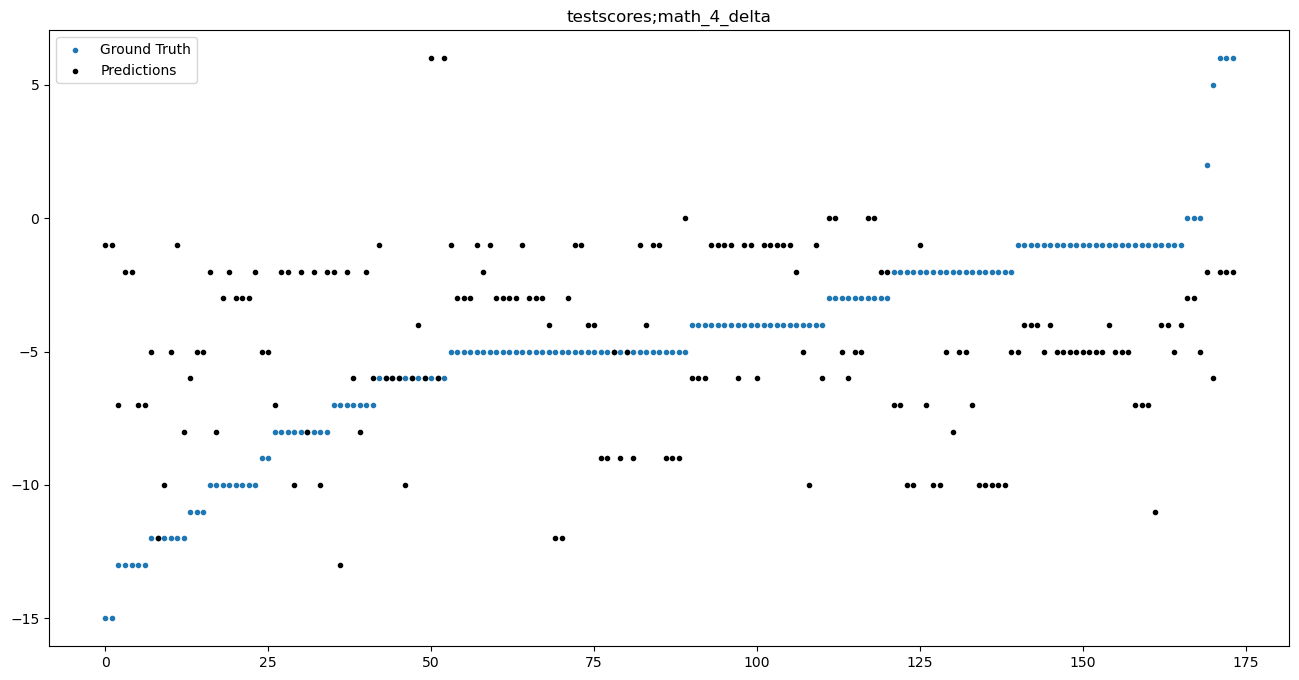

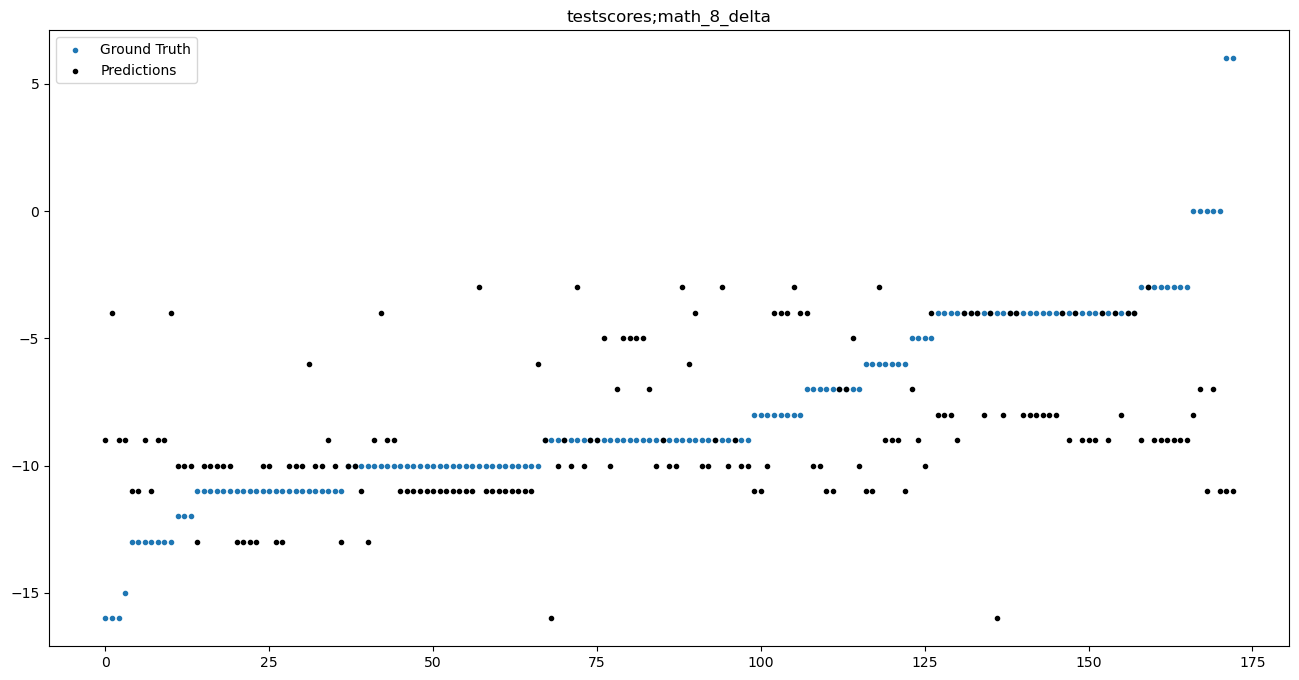

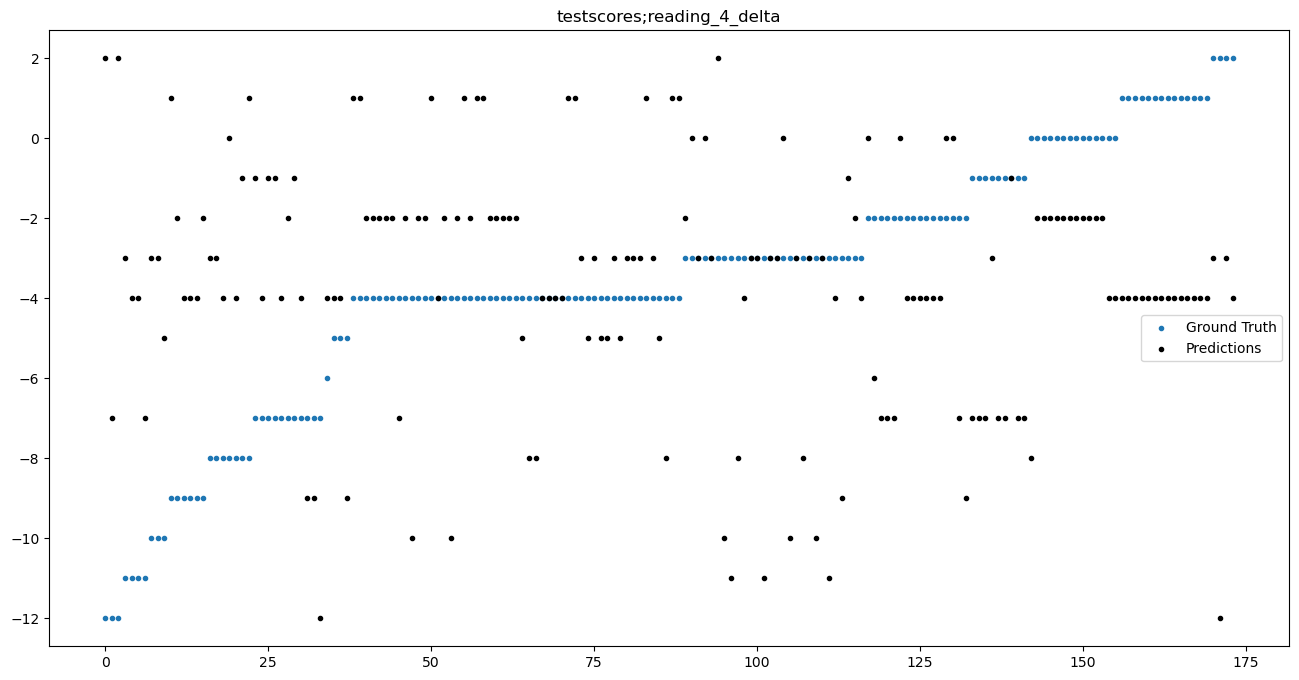

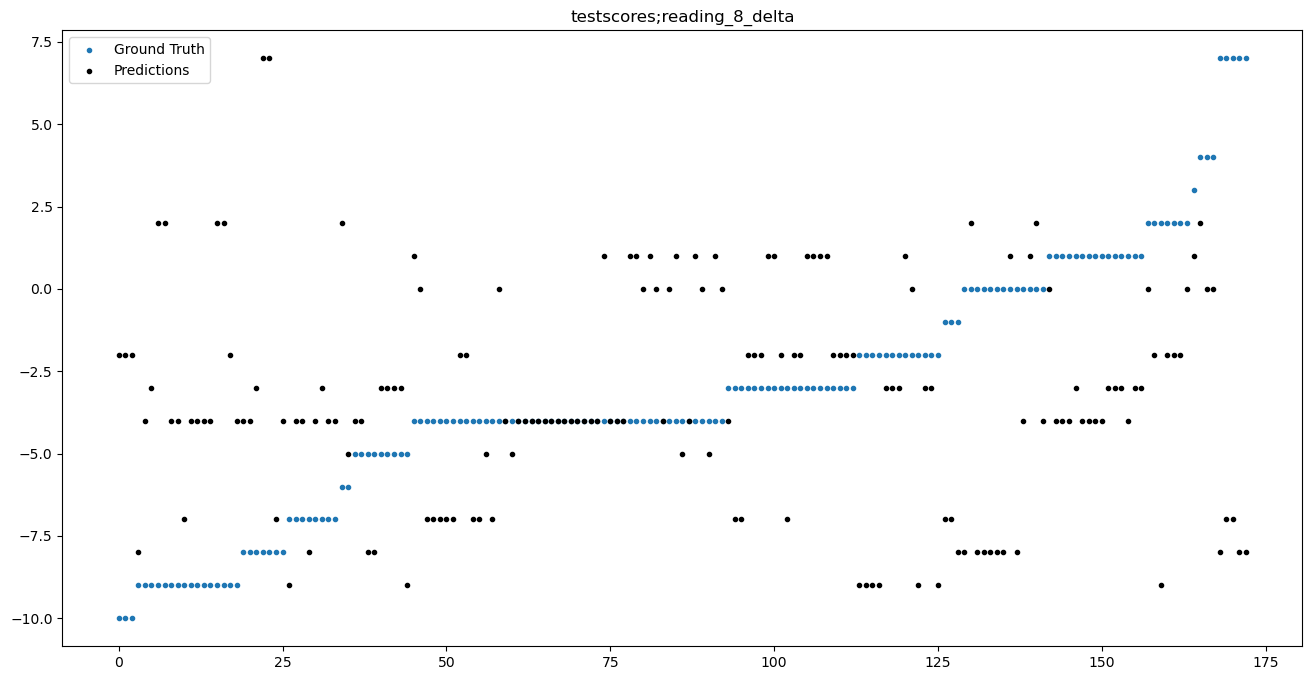

In [39]:
plot_residuals(five_fold_results)

<a id='model1c_model'></a>

## Model 1c: Predict SAT Scores from All Data

[(Back to top)](#models)

In [40]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_2022', 
           'testscores;sat_ebrw_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   LogisticRegression(), 
                                   n_splits=5)


Dataset for testscores;sat_math_2022 has 176 samples after filtering
Dataset for testscores;sat_ebrw_2022 has 176 samples after filtering


<a id='model1c_results'></a>

### Model 1c Testing Results

[(Back to top)](#models)

In [42]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_2022
test_r2,-3.4684
test_root_mean_squared_error,69.2287


testscores;sat_math_2022: 69.2287


,testscores;sat_ebrw_2022
test_r2,-3.3962
test_root_mean_squared_error,63.3231


testscores;sat_ebrw_2022: 63.3231


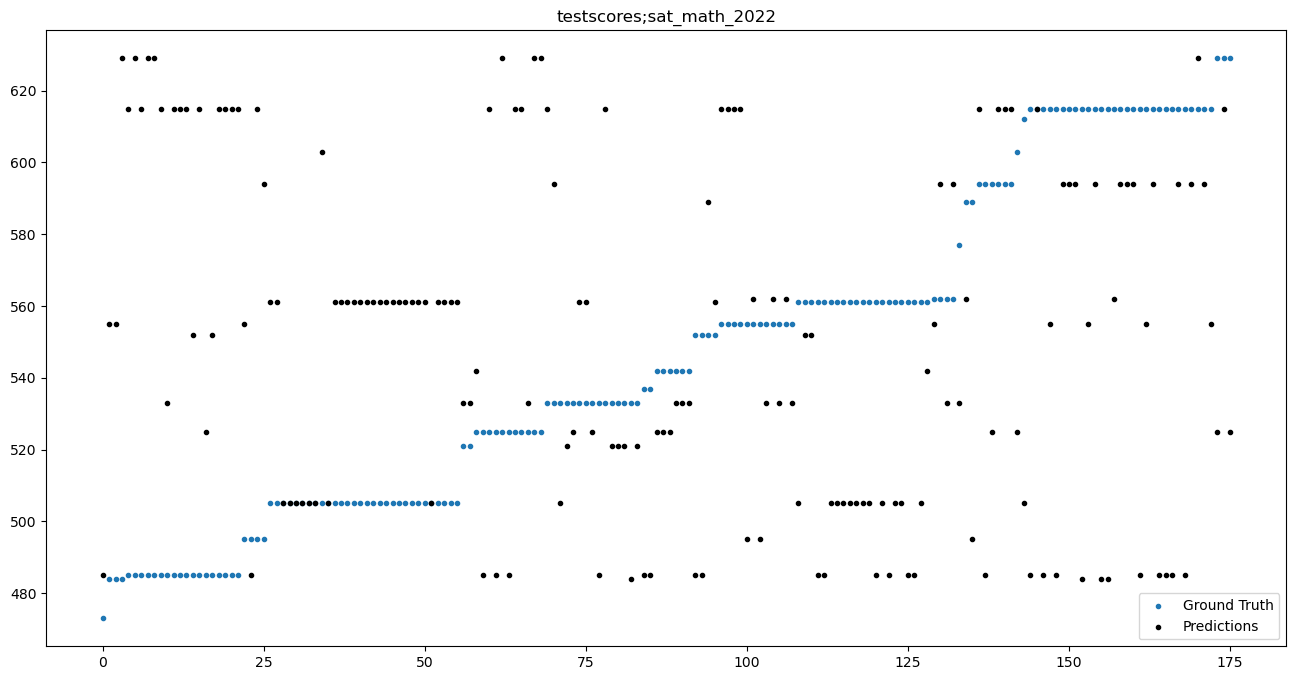

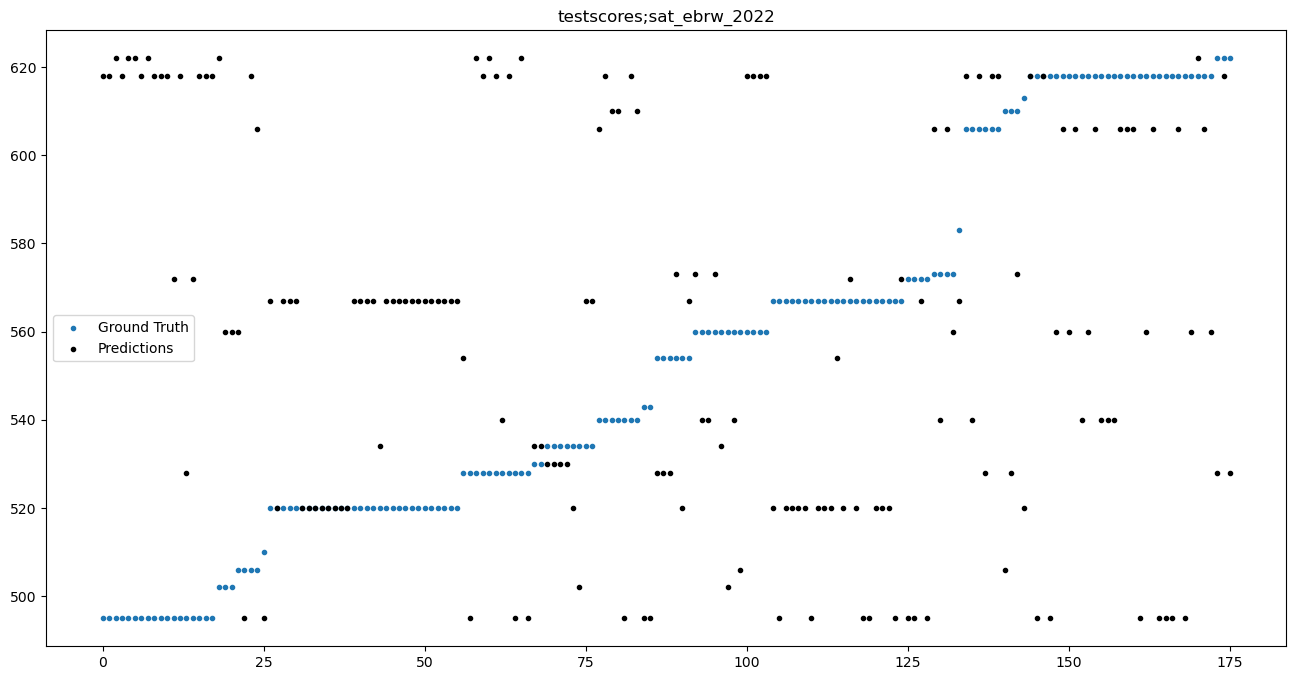

In [43]:
plot_residuals(five_fold_results)

<a id='model1d_model'></a>

## Model 1d: Predict SAT Score Change from All Data

[(Back to top)](#models)

In [44]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_delta', 
           'testscores;sat_ebrw_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   LogisticRegression(), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


<a id='model1d_results'></a>

### Model 1d Testing Results

[(Back to top)](#models)

In [45]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-1.6151
test_root_mean_squared_error,16.6455


testscores;sat_math_delta: 16.6455


,testscores;sat_ebrw_delta
test_r2,-1.8361
test_root_mean_squared_error,17.7193


testscores;sat_ebrw_delta: 17.7193


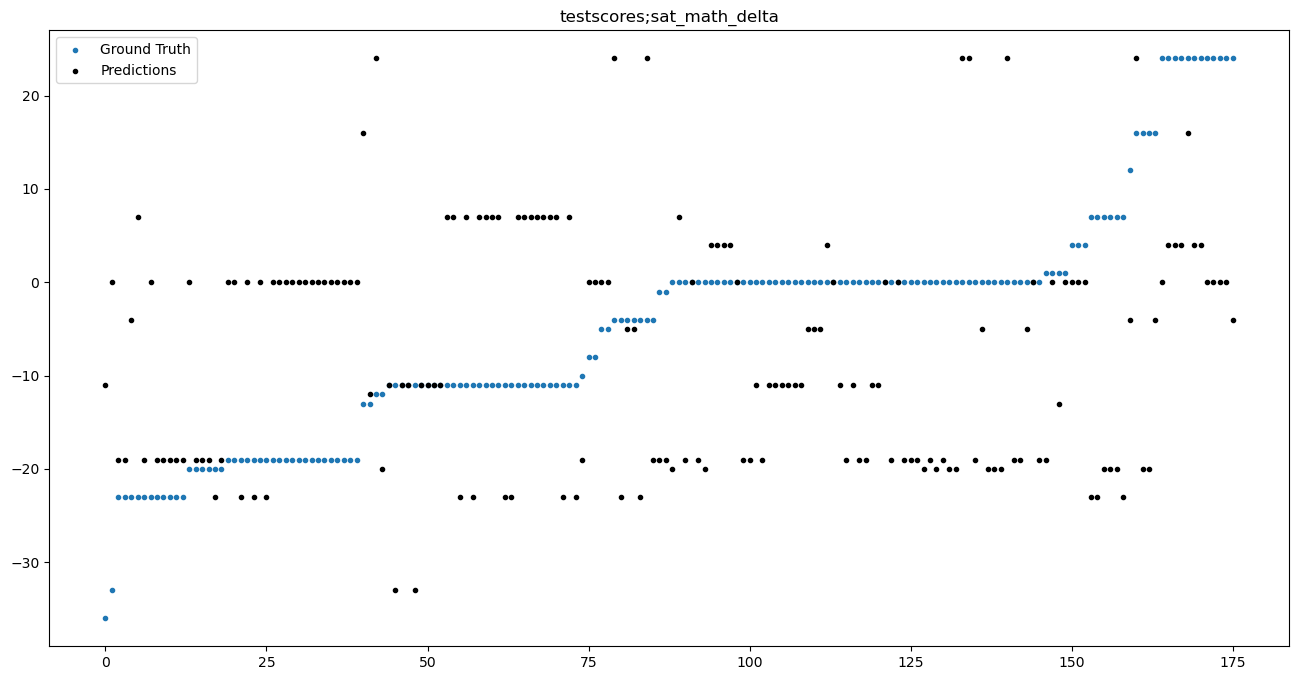

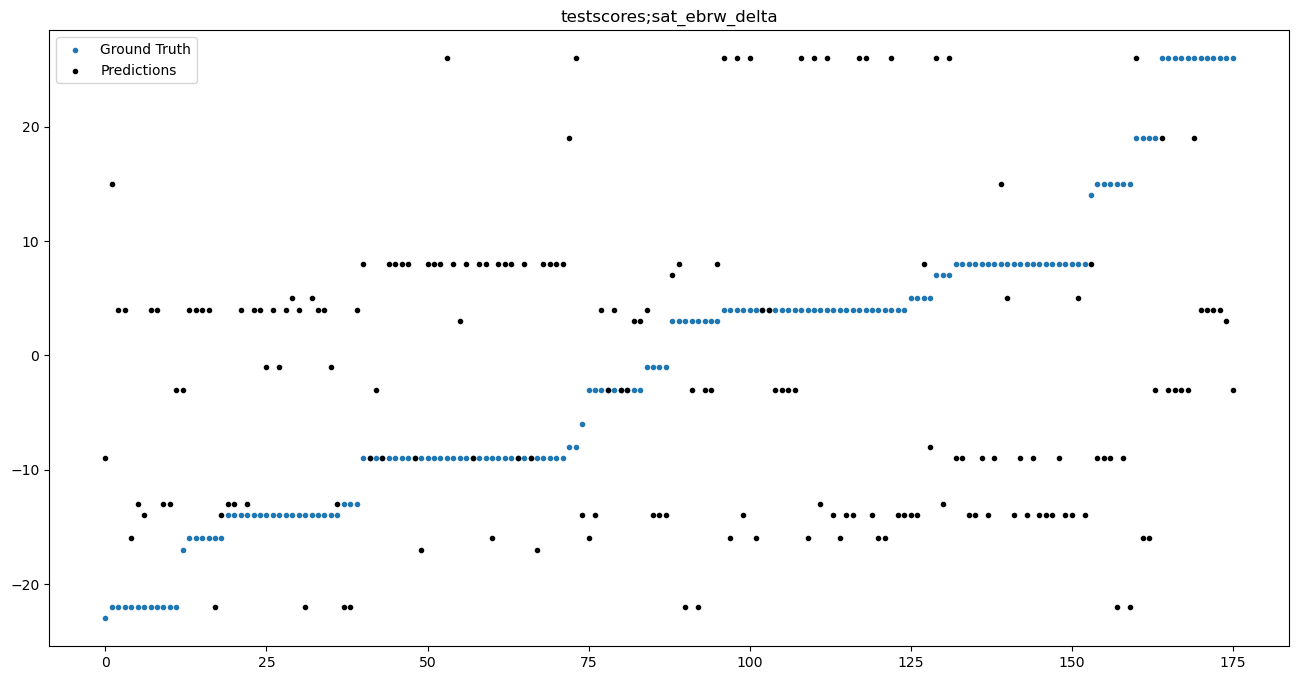

In [46]:
plot_residuals(five_fold_results)

<a id='model2a_model'></a>

## Model 2a: Predict 8th and 4th Grade Test Scores from Locale Type (Best Baseline) Data

[(Back to top)](#models)

In [47]:
FEATURES = ['districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural']

TARGETS = ['testscores;math_4_2022', 
           'testscores;math_8_2022', 
           'testscores;reading_4_2022', 
           'testscores;reading_8_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   LogisticRegression(), 
                                   n_splits=5)


Dataset for testscores;math_4_2022 has 174 samples after filtering
Dataset for testscores;math_8_2022 has 173 samples after filtering
Dataset for testscores;reading_4_2022 has 174 samples after filtering
Dataset for testscores;reading_8_2022 has 173 samples after filtering


<a id='model2a_results'></a>

### Model 2a Testing Results

[(Back to top)](#models)

In [48]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_2022
test_r2,-0.0698
test_root_mean_squared_error,6.5341


testscores;math_4_2022: 6.5341


,testscores;math_8_2022
test_r2,0.3028
test_root_mean_squared_error,5.3013


testscores;math_8_2022: 5.3013


,testscores;reading_4_2022
test_r2,-0.3166
test_root_mean_squared_error,7.3557


testscores;reading_4_2022: 7.3557


,testscores;reading_8_2022
test_r2,-0.0931
test_root_mean_squared_error,5.3011


testscores;reading_8_2022: 5.3011


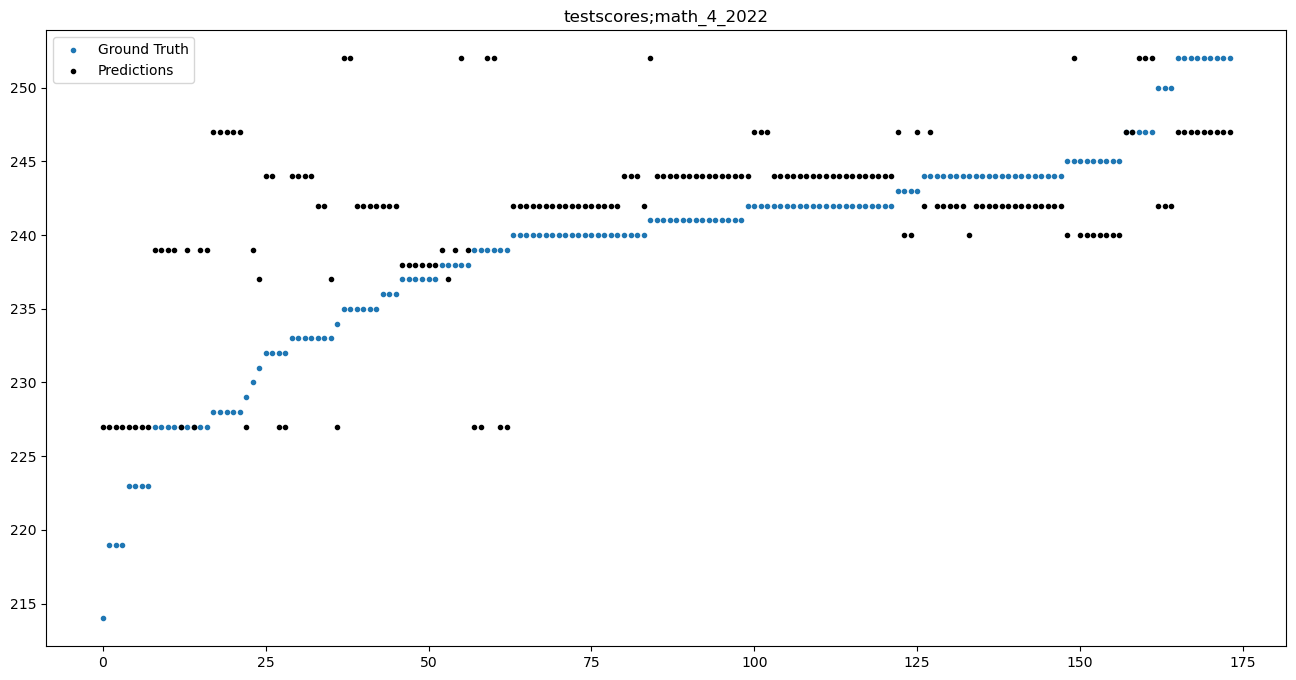

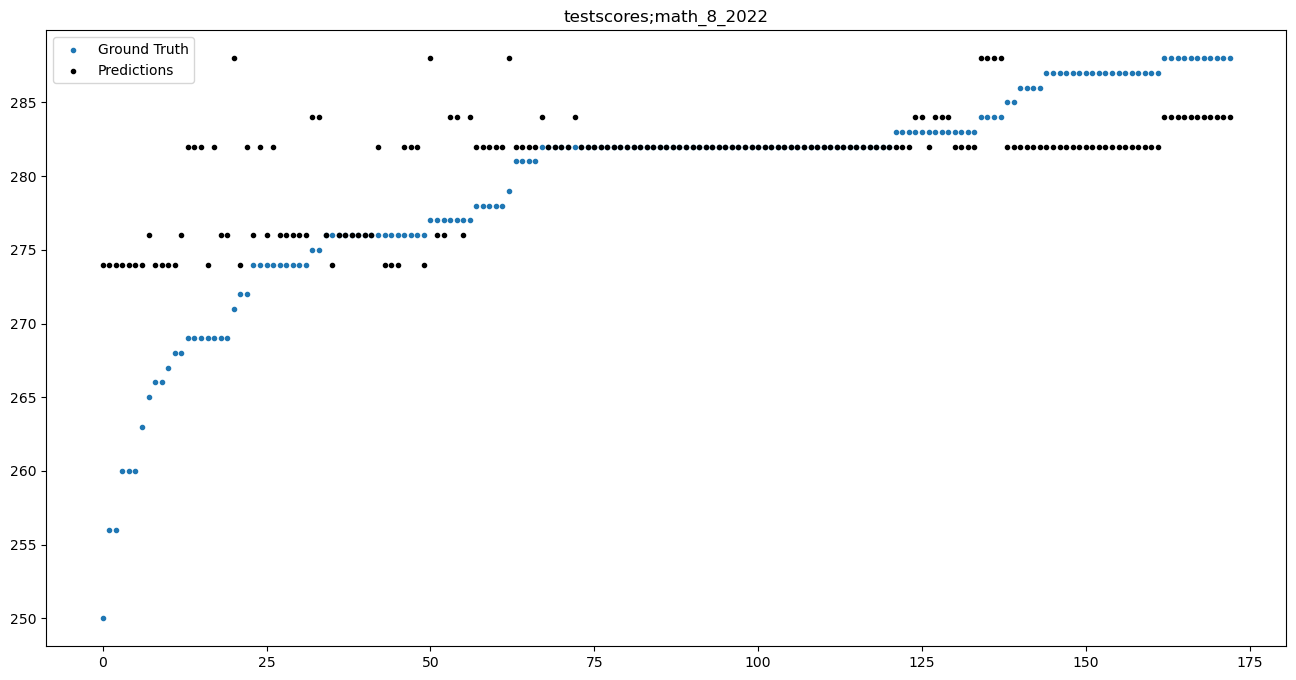

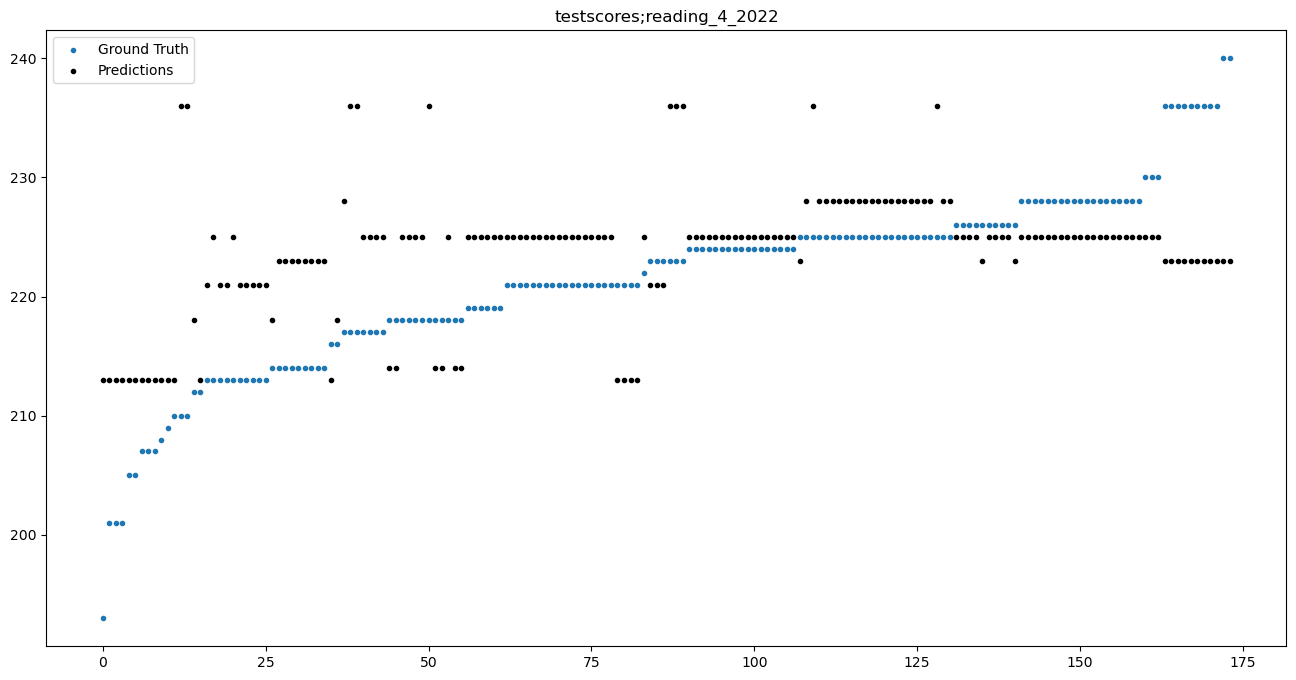

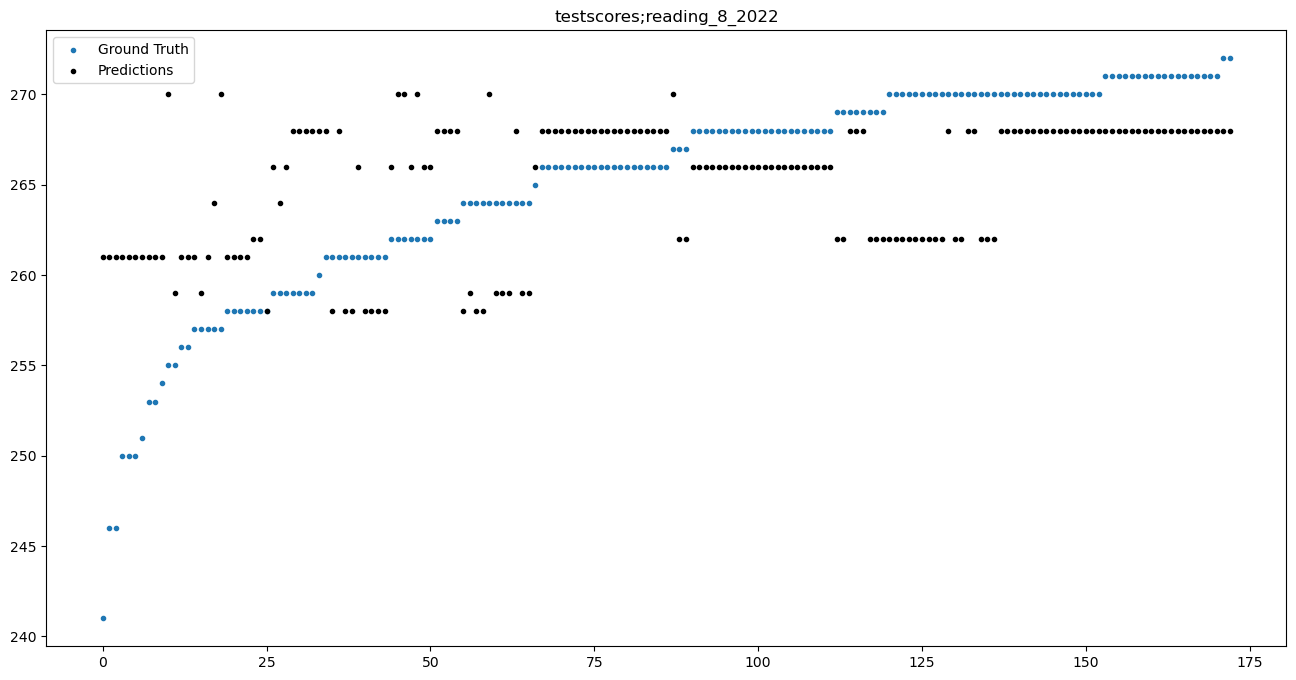

In [49]:
plot_residuals(five_fold_results)

<a id='model2b_model'></a>

## Model 2b: Predict Change In 8th and 4th Grade Test Scores from Engagement and Locale (Best Baseline) Data

[(Back to top)](#models)

In [50]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural']

TARGETS = ['testscores;math_4_delta', 
           'testscores;math_8_delta', 
           'testscores;reading_4_delta', 
           'testscores;reading_8_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   LogisticRegression(), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


<a id='model2b_results'></a>

### Model 2b Testing Results

[(Back to top)](#models)

In [51]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-1.0134
test_root_mean_squared_error,4.4373


testscores;math_4_delta: 4.4373


,testscores;math_8_delta
test_r2,-2.8210
test_root_mean_squared_error,5.2797


testscores;math_8_delta: 5.2797


,testscores;reading_4_delta
test_r2,-0.8110
test_root_mean_squared_error,3.8404


testscores;reading_4_delta: 3.8404


,testscores;reading_8_delta
test_r2,-1.1208
test_root_mean_squared_error,4.5794


testscores;reading_8_delta: 4.5794


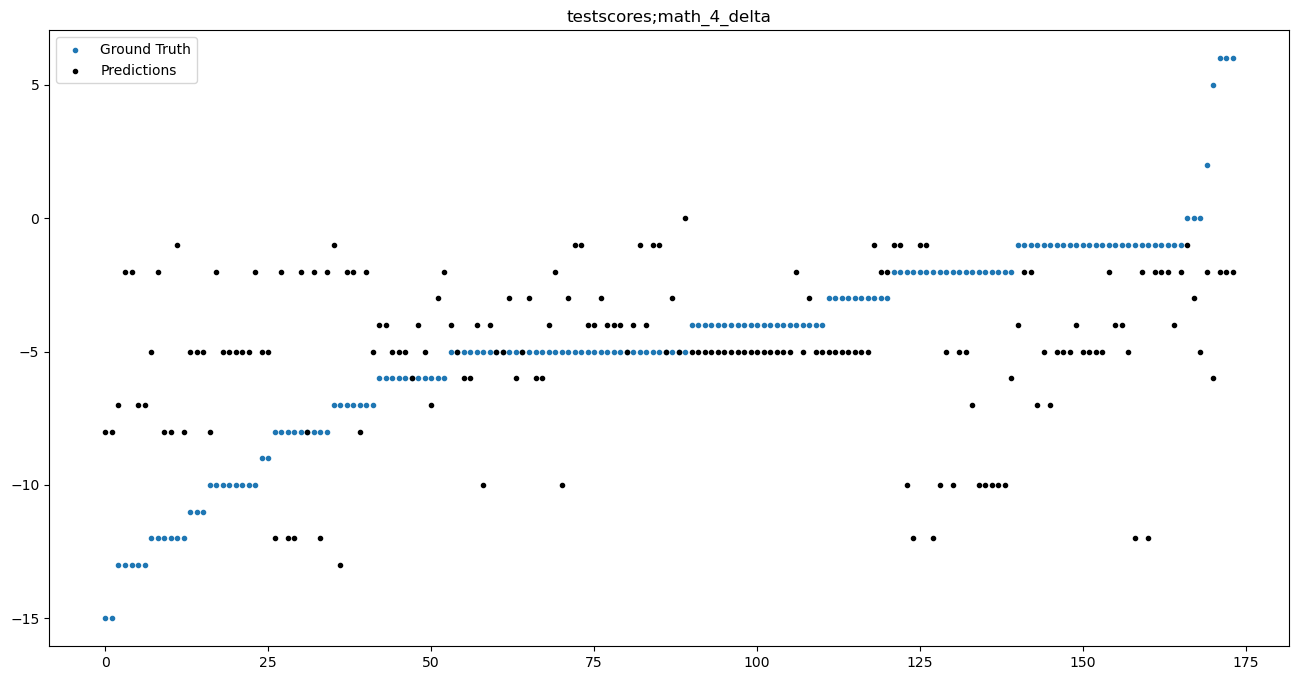

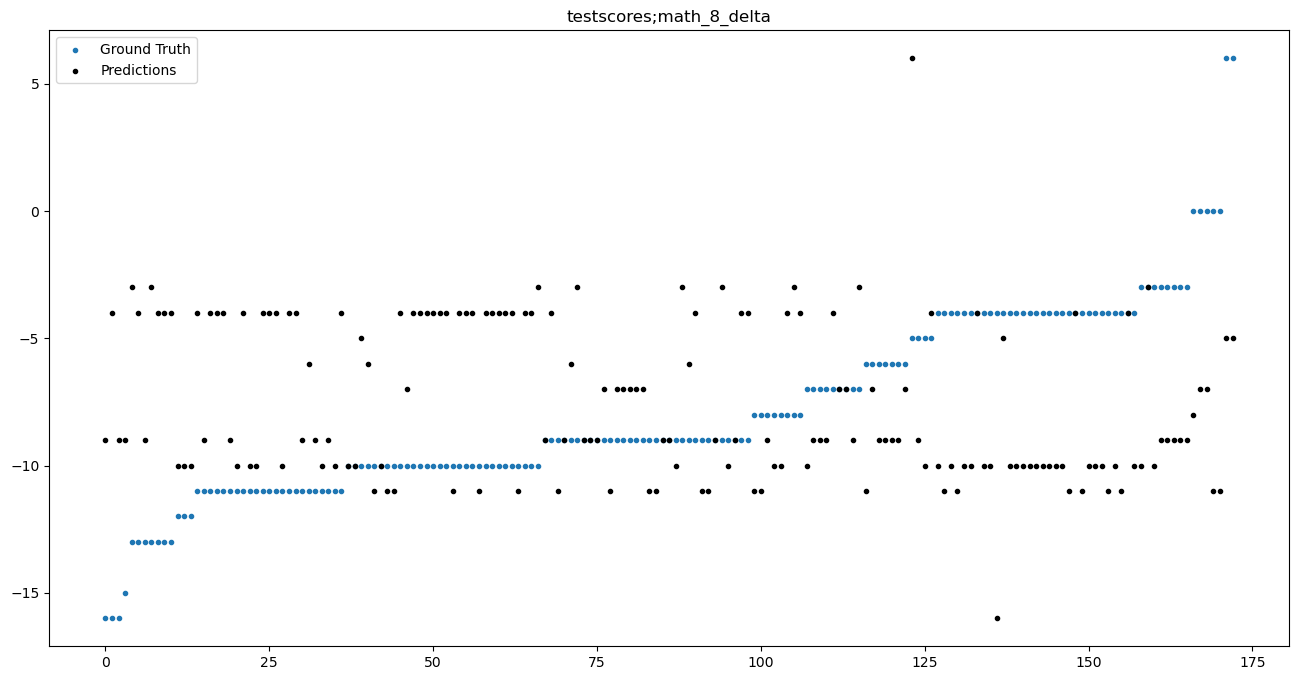

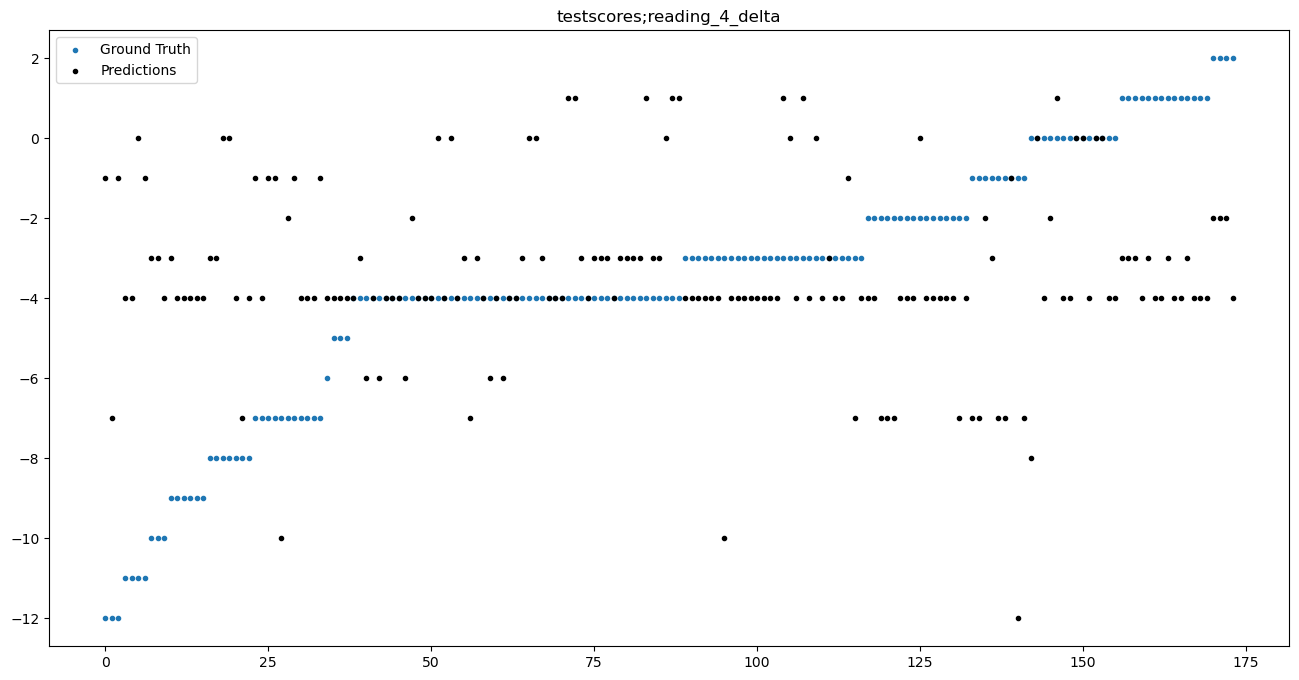

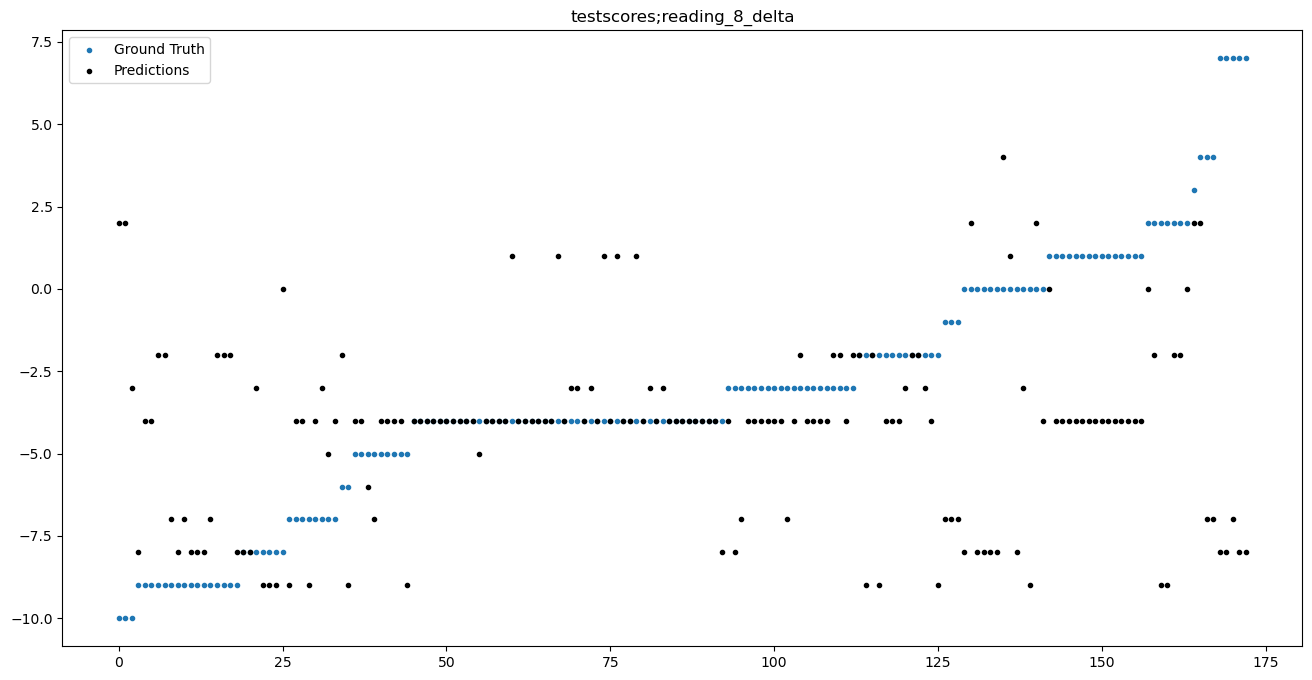

In [52]:
plot_residuals(five_fold_results)

<a id='model2c_model'></a>

## Model 2c: Predict SAT Scores from Engagement (Best Baseline) Data

[(Back to top)](#models)

In [53]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing']

TARGETS = ['testscores;sat_math_2022', 
           'testscores;sat_ebrw_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   LogisticRegression(), 
                                   n_splits=5)


Dataset for testscores;sat_math_2022 has 176 samples after filtering
Dataset for testscores;sat_ebrw_2022 has 176 samples after filtering


<a id='model2c_results'></a>

### Model 2c Testing Results

[(Back to top)](#models)

In [54]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_2022
test_r2,-3.7378
test_root_mean_squared_error,68.2321


testscores;sat_math_2022: 68.2321


,testscores;sat_ebrw_2022
test_r2,-3.4114
test_root_mean_squared_error,61.3291


testscores;sat_ebrw_2022: 61.3291


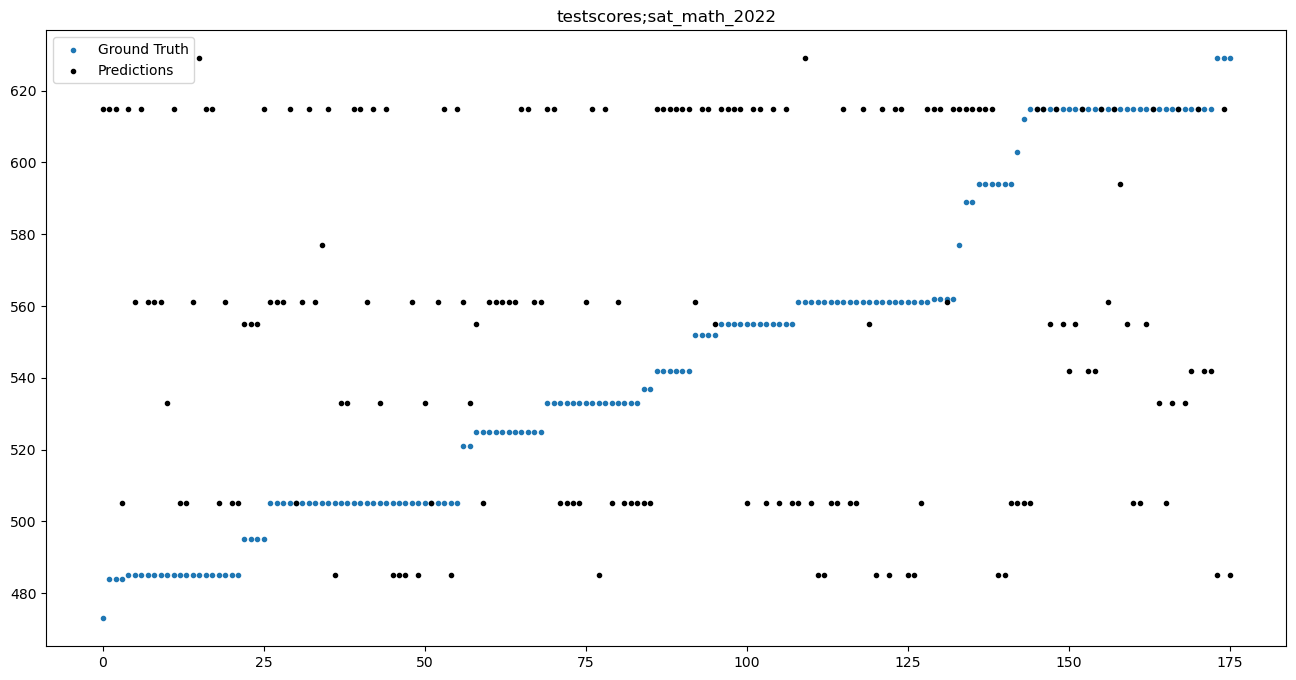

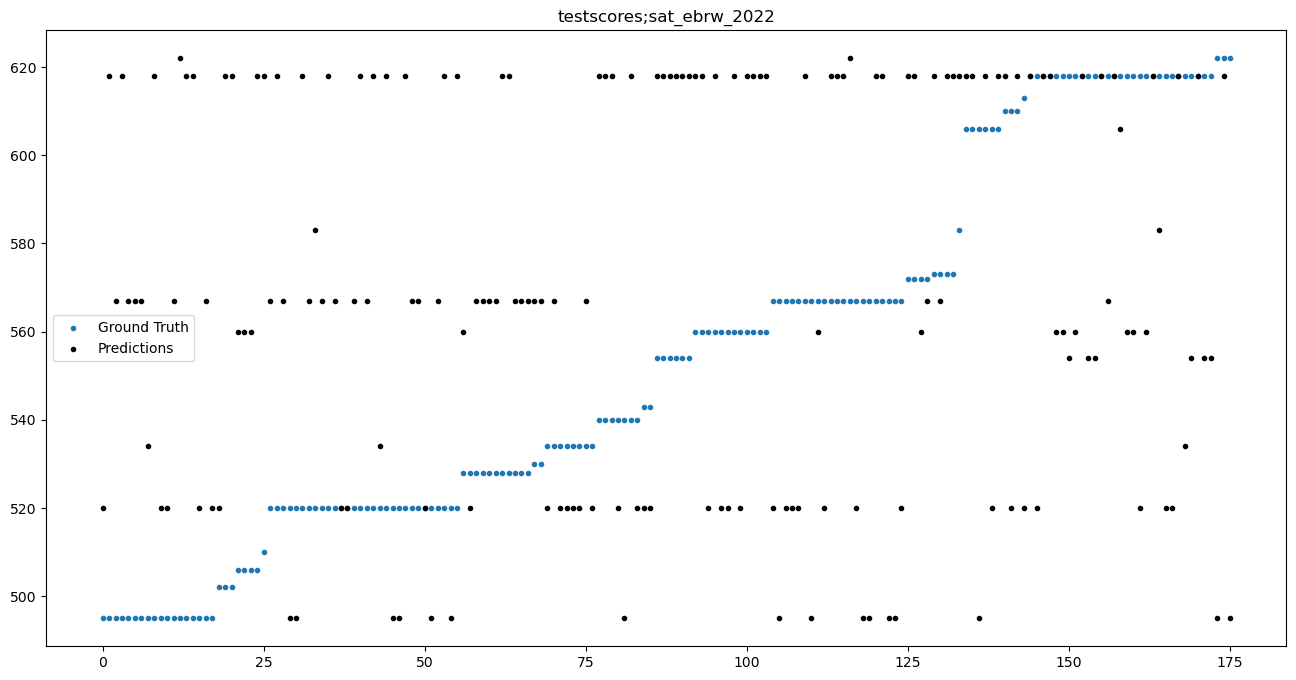

In [55]:
plot_residuals(five_fold_results)

<a id='model2d_model'></a>

## Model 2d: Predict SAT Score Change from Broadband (Best Baseline) Data

[(Back to top)](#models)

In [56]:
FEATURES = ['broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_delta', 
           'testscores;sat_ebrw_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   LogisticRegression(), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


<a id='model2d_results'></a>

### Model 2d Testing Results

[(Back to top)](#models)

In [57]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-2.0999
test_root_mean_squared_error,17.4318


testscores;sat_math_delta: 17.4318


,testscores;sat_ebrw_delta
test_r2,-1.8373
test_root_mean_squared_error,17.5599


testscores;sat_ebrw_delta: 17.5599


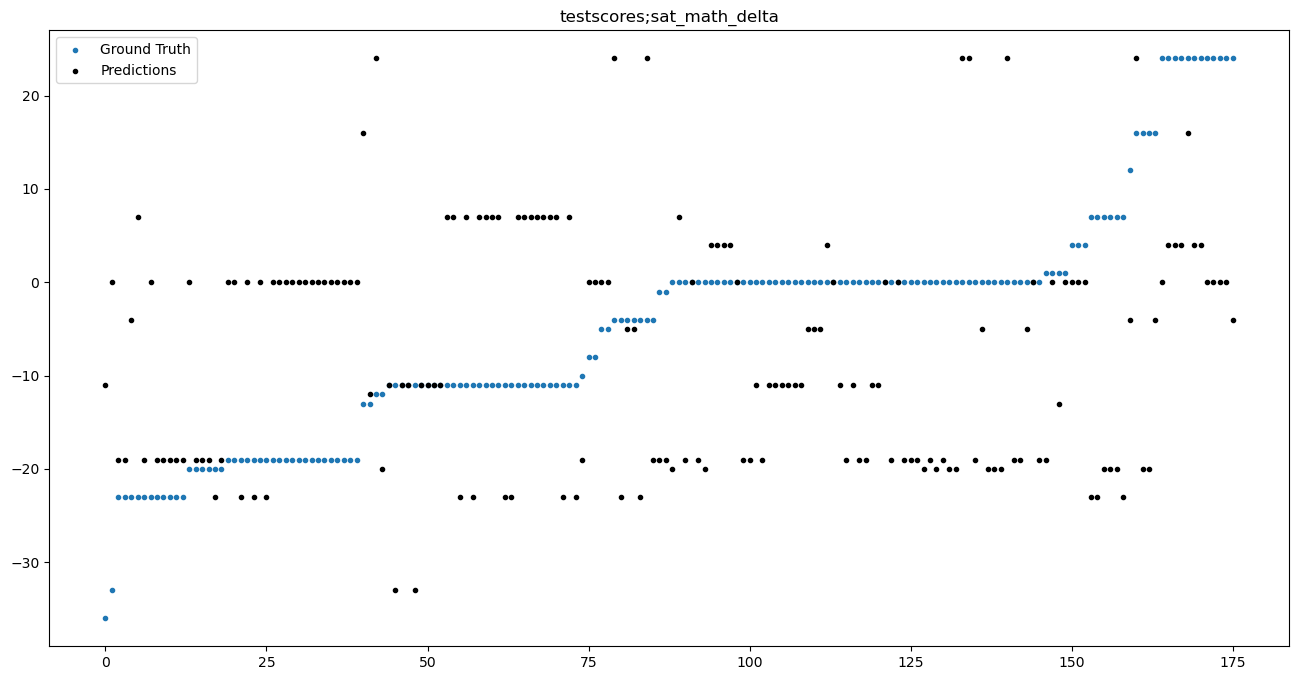

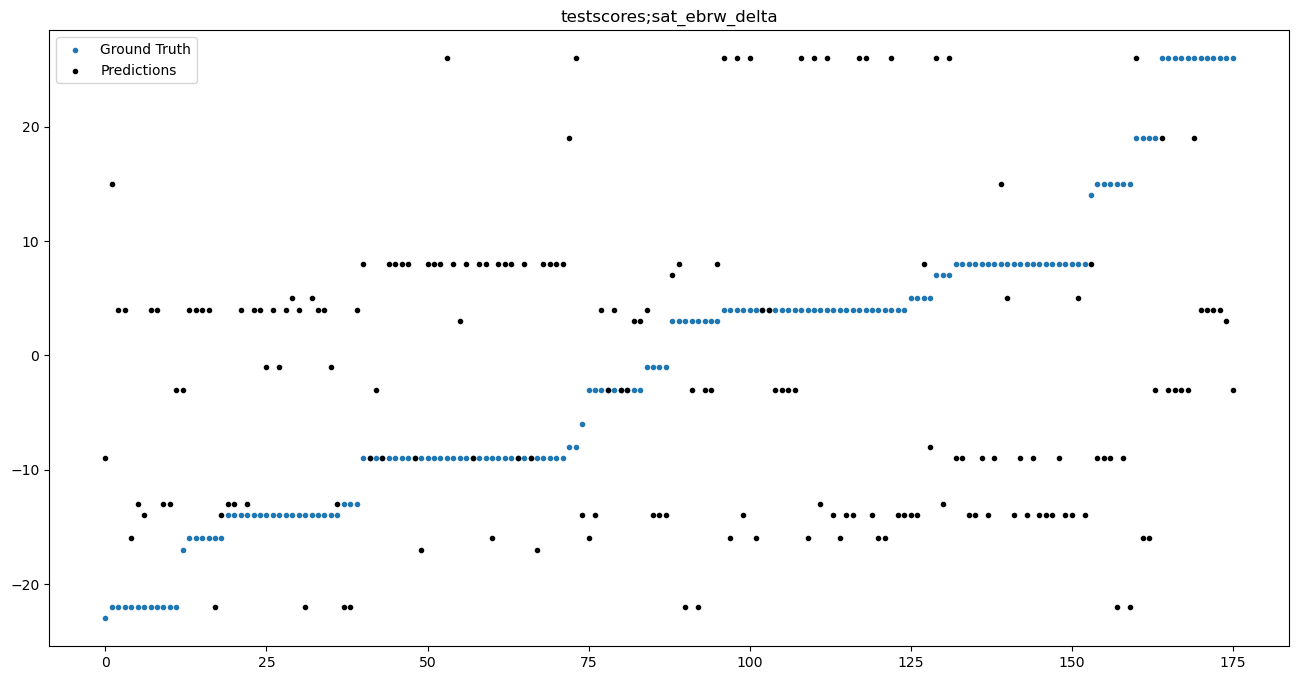

In [46]:
plot_residuals(five_fold_results)

-------------